In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)
log_reg.score(X_test, y_test)

0.9498607242339833

## 通过传入micro参数，解决多分类问题

In [7]:
y_predict = log_reg.predict(X_test)

In [8]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [9]:

precision_score(y_test, y_predict, average='micro')

0.9498607242339833

## 多分类中的混淆矩阵
> **观察矩阵，可以清楚在哪个地方犯错，进而改进算法**

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 28,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  0,  1, 32]], dtype=int64)

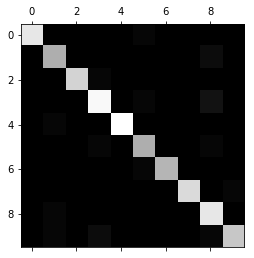

In [13]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [17]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix,0)
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05263158, 0.        ],
       [0.        , 0.        , 0.        , 0.02272727, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03333333, 0.        , 0.        , 0.07894737, 0.        ],
       [0.        , 0.03333333, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.02272727, 0.        ,
        0.        , 0.        , 0.        , 0.02631579, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

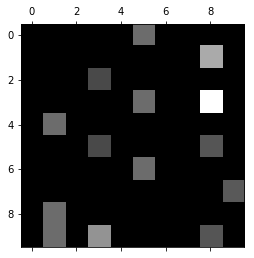

In [18]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()